# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import zscore

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

In [3]:
from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta

# Loading the dataset|

In [4]:
# Loading the dataset
df = pd.read_csv('output_file1.csv')
df_2022 = pd.read_csv("Book1.csv")

In [5]:
df

,Source.Name,Open time,Open,Date,Quartile,Month,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,XRPUSDT-1d-2023-01.csv,1.670000e+12,0.3389,01-01-2023,Q1,January,0.3400,0.3354,0.3387,102026821,1.670000e+12,3.447164e+07,48661,53592277,1.810790e+07,0
1,XRPUSDT-1d-2023-01.csv,1.670000e+12,0.3386,02-01-2023,Q1,January,0.3555,0.3000,0.3482,647520487,1.670000e+12,2.178040e+08,285660,320823575,1.080569e+08,0
2,XRPUSDT-1d-2023-01.csv,1.670000e+12,0.3482,03-01-2023,Q1,January,0.3520,0.3395,0.3436,346410334,1.670000e+12,1.195113e+08,154113,172318472,5.944846e+07,0
3,XRPUSDT-1d-2023-01.csv,1.670000e+12,0.3436,04-01-2023,Q1,January,0.3605,0.3390,0.3472,372672796,1.670000e+12,1.295853e+08,147677,193027855,6.713928e+07,0
4,XRPUSDT-1d-2023-01.csv,1.670000e+12,0.3471,05-01-2023,Q1,January,0.3487,0.3333,0.3380,265529668,1.670000e+12,9.073585e+07,106910,129294274,4.418781e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,XRPUSDT-1d-2023-11.csv,1.670000e+12,0.4077,26-11-2023,Q4,November,0.4146,0.3927,0.3960,184581391,1.670000e+12,7.455515e+07,126149,84383604,3.408793e+07,0
330,XRPUSDT-1d-2023-11.csv,1.670000e+12,0.3960,27-11-2023,Q4,November,0.4096,0.3942,0.3962,199432182,1.670000e+12,8.019742e+07,125340,93450039,3.758539e+07,0
331,XRPUSDT-1d-2023-11.csv,1.670000e+12,0.3961,28-11-2023,Q4,November,0.3991,0.3730,0.3888,434930297,1.670000e+12,1.664232e+08,240458,216541344,8.284858e+07,0
332,XRPUSDT-1d-2023-11.csv,1.670000e+12,0.3888,29-11-2023,Q4,November,0.4039,0.3829,0.3981,355638077,1.670000e+12,1.393426e+08,195717,178271306,6.983784e+07,0


In [6]:
df_2022

,Source.Name,Open time,Open,Date,Quartile,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,XRPUSDT-1d-2022-01.csv,1.640000e+12,0.8298,01-01-2023,Q1,0.8557,0.8297,0.8507,136976730.0,1.640000e+12,1.155075e+08,178238,70090109.0,5.911341e+07,0
1,XRPUSDT-1d-2022-01.csv,1.640000e+12,0.8508,02-01-2023,Q1,0.8667,0.8372,0.8586,129688032.0,1.640000e+12,1.102656e+08,176940,65996017.0,5.611762e+07,0
2,XRPUSDT-1d-2022-01.csv,1.640000e+12,0.8586,03-01-2023,Q1,0.8587,0.8213,0.8324,178618617.0,1.640000e+12,1.498761e+08,232484,89735857.0,7.529882e+07,0
3,XRPUSDT-1d-2022-01.csv,1.640000e+12,0.8324,04-01-2023,Q1,0.8456,0.7794,0.8228,214415744.0,1.640000e+12,1.776919e+08,270966,104076850.0,8.636767e+07,0
4,XRPUSDT-1d-2022-01.csv,1.640000e+12,0.8227,05-01-2023,Q1,0.8372,0.7092,0.7726,370612510.0,1.640000e+12,2.947838e+08,482373,173152247.0,1.379976e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,XRPUSDT-1d-2022-12.csv,1.670000e+12,0.3657,27-12-2023,Q4,0.3731,0.3586,0.3675,385194770.0,1.670000e+12,1.413965e+08,181577,185304598.0,6.803199e+07,0
361,XRPUSDT-1d-2022-12.csv,1.670000e+12,0.3675,28-12-2023,Q4,0.3687,0.3546,0.3558,337095747.0,1.670000e+12,1.212461e+08,164923,165972570.0,5.968995e+07,0
362,XRPUSDT-1d-2022-12.csv,1.670000e+12,0.3559,29-12-2023,Q4,0.3577,0.3361,0.3421,347820025.0,1.670000e+12,1.201069e+08,159297,170655080.0,5.892441e+07,0
363,XRPUSDT-1d-2022-12.csv,1.670000e+12,0.3421,30-12-2023,Q4,0.3461,0.3337,0.3451,270037618.0,1.670000e+12,9.162406e+07,123668,137330213.0,4.660425e+07,0


# Data cleaning - 2023

In [7]:
# Converting 'Date' column to datetime DD-MM-YYYY format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [8]:
# Dropping duplicates from the data set.
df.drop_duplicates(inplace=True) 

In [9]:
# Handling missing values
df.fillna(method='ffill', inplace=True)

<ipython-input-9-54285ab024f5>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
print( "Data is cleaned:")
print(df.info())

Data is cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Source.Name                   334 non-null    object        
 1   Open time                     334 non-null    float64       
 2   Open                          334 non-null    float64       
 3   Date                          334 non-null    datetime64[ns]
 4   Quartile                      334 non-null    object        
 5   Month                         334 non-null    object        
 6   High                          334 non-null    float64       
 7   Low                           334 non-null    float64       
 8   Close                         334 non-null    float64       
 9   Volume                        334 non-null    int64         
 10  Close time                    334 non-null    float64       
 11  Quote asset vol

In [11]:
# Calculating z-scores for only numeric columns
z_calculated_score = zscore(df.select_dtypes(include=['number']))

# Setting a threshold for z-scores
threshold = 3

# Identifing and removing the outliers
df_no_outliers = df[(abs(z_calculated_score) < threshold).all(axis=1)]

In [12]:
# shape before and after removal of outliers
print("Shape before:", df.shape)
print("Shape after:", df_no_outliers.shape)

Shape before: (334, 16)
Shape after: (0, 16)


# Data Cleaning - 2022

In [13]:
# Converting 'Date' column to datetime DD-MM-YYYY format.
df_2022['Date'] = pd.to_datetime(df_2022['Date'], format='%d-%m-%Y')

In [14]:
# Data Cleaning

# Dropping duplicates
df_2022.drop_duplicates(inplace=True)

In [15]:
# Handling missing values
df_2022.fillna(method='ffill', inplace=True)

<ipython-input-15-3521053a6ef7>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_2022.fillna(method='ffill', inplace=True)


In [16]:
print("Data is cleaned:")
print(df_2022.info())

Data is cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Source.Name                   365 non-null    object        
 1   Open time                     365 non-null    float64       
 2   Open                          365 non-null    float64       
 3   Date                          365 non-null    datetime64[ns]
 4   Quartile                      365 non-null    object        
 5   High                          365 non-null    float64       
 6   Low                           365 non-null    float64       
 7   Close                         365 non-null    float64       
 8   Volume                        365 non-null    float64       
 9   Close time                    365 non-null    float64       
 10  Quote asset volume            365 non-null    float64       
 11  Number of trade

# Descriptive Analysis - 2022 Data

In [17]:
# Descriptive Analysis

print("\nDescriptive Statistics:")

# Summary of 2022 dataset
print(df_2022.describe())
df_2022.describe().to_csv('df_2022_describe.csv')


Descriptive Statistics:
          Open time        Open                 Date        High         Low  \
count  3.650000e+02  365.000000                  365  365.000000  365.000000   
mean   1.656630e+12    0.513872  2023-07-02 00:00:00    0.529255    0.494882   
min    1.640000e+12    0.307400  2023-01-01 00:00:00    0.318100    0.287200   
25%    1.650000e+12    0.365700  2023-04-02 00:00:00    0.377200    0.350900   
50%    1.660000e+12    0.422900  2023-07-02 00:00:00    0.442800    0.403000   
75%    1.660000e+12    0.712700  2023-10-01 00:00:00    0.731300    0.692400   
max    1.670000e+12    0.876300  2023-12-31 00:00:00    0.930000    0.852800   
std    9.799511e+09    0.181146                  NaN    0.186847    0.175091   

            Close        Volume    Close time  Quote asset volume  \
count  365.000000  3.650000e+02  3.650000e+02        3.650000e+02   
mean     0.512531  3.483196e+08  1.656712e+12        1.770129e+08   
min      0.307500  6.285791e+07  1.640000e+12  

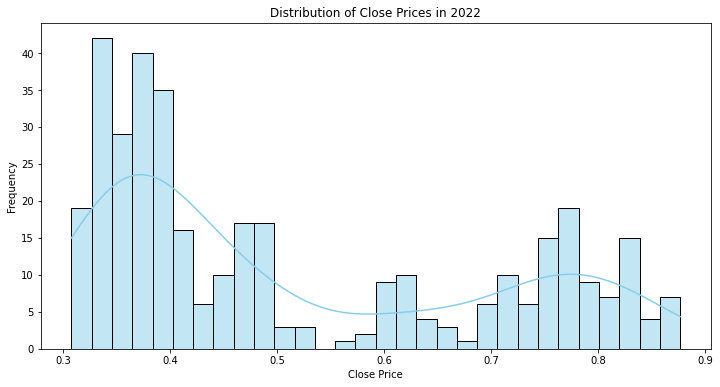

In [18]:
# Histogram showing the distribution of the Close column.
plt.figure(figsize=(12, 6))
sns.histplot(df_2022['Close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Close Prices in 2022')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

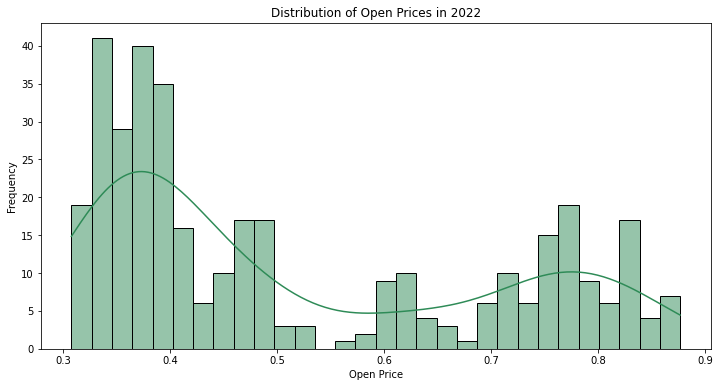

In [19]:
# Histogram showing the distribution of the Open column
plt.figure(figsize=(12, 6))
sns.histplot(df_2022['Open'], bins=30, kde=True, color='seagreen')
plt.title('Distribution of Open Prices in 2022')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

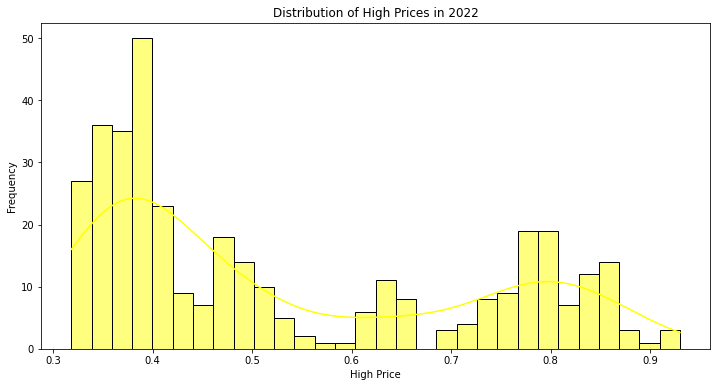

In [20]:
# Histogram showing the distribution of High column
plt.figure(figsize=(12, 6))
sns.histplot(df_2022['High'], bins=30, kde=True, color='yellow')
plt.title('Distribution of High Prices in 2022')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.show()

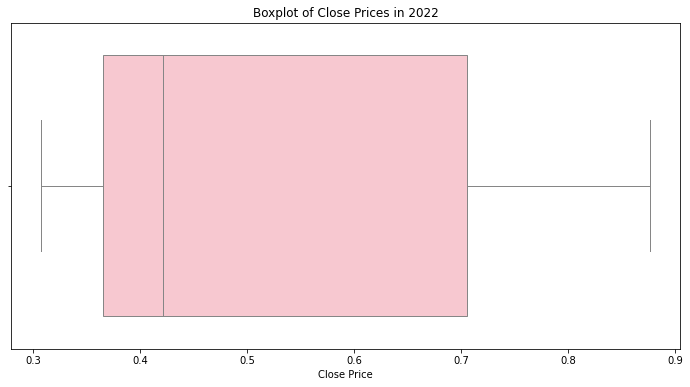

In [21]:
# Boxplot to show the close prices in 2022
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_2022['Close'], color='pink')
plt.title('Boxplot of Close Prices in 2022')
plt.xlabel('Close Price')
plt.show()

In [22]:
#Correlation Analysis
correlation_matrix = df_2022.corr
print(correlation_matrix)

<bound method DataFrame.corr of                 Source.Name     Open time    Open       Date Quartile    High  \
0    XRPUSDT-1d-2022-01.csv  1.640000e+12  0.8298 2023-01-01       Q1  0.8557   
1    XRPUSDT-1d-2022-01.csv  1.640000e+12  0.8508 2023-01-02       Q1  0.8667   
2    XRPUSDT-1d-2022-01.csv  1.640000e+12  0.8586 2023-01-03       Q1  0.8587   
3    XRPUSDT-1d-2022-01.csv  1.640000e+12  0.8324 2023-01-04       Q1  0.8456   
4    XRPUSDT-1d-2022-01.csv  1.640000e+12  0.8227 2023-01-05       Q1  0.8372   
..                      ...           ...     ...        ...      ...     ...   
360  XRPUSDT-1d-2022-12.csv  1.670000e+12  0.3657 2023-12-27       Q4  0.3731   
361  XRPUSDT-1d-2022-12.csv  1.670000e+12  0.3675 2023-12-28       Q4  0.3687   
362  XRPUSDT-1d-2022-12.csv  1.670000e+12  0.3559 2023-12-29       Q4  0.3577   
363  XRPUSDT-1d-2022-12.csv  1.670000e+12  0.3421 2023-12-30       Q4  0.3461   
364  XRPUSDT-1d-2022-12.csv  1.670000e+12  0.3450 2023-12-31       Q4  0.3453

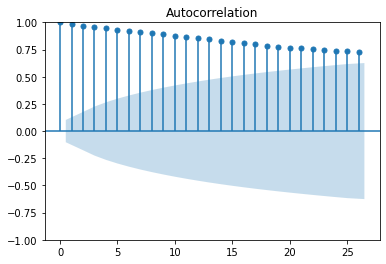

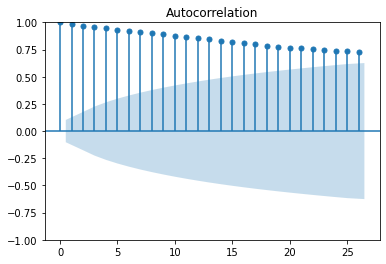

In [23]:
#Time Series Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

adfuller(df_2022['Close']) # test for stationarity

plot_acf(df_2022['Close']) # check autocorrelation

In [24]:
# displaying statistical analysis
mean = df_2022['Close'].mean() 
median = df_2022['Close'].median()
std_dev = df_2022['Close'].std() 

In [25]:
print("Mean:", mean) 
print("Median:", median)
print("Standard deviation:", std_dev)

Mean: 0.5125306849315069
Median: 0.4218
Standard deviation: 0.18061711503249475


# Descriptive Analysis - 2023 Data

In [26]:
# Descriptive Analysis

print("\nDescriptive Statistics:")

# Summary statistics
print(df.describe())  
df.describe().to_csv('df_describe.csv')


Descriptive Statistics:
          Open time        Open                 Date        High         Low  \
count  3.340000e+02  334.000000                  334  334.000000  334.000000   
mean   1.684311e+12    0.480450  2023-06-16 12:00:00    0.493224    0.466328   
min    1.670000e+12    0.333200  2023-01-01 00:00:00    0.340000    0.300000   
25%    1.680000e+12    0.401200  2023-03-25 06:00:00    0.412050    0.390950   
50%    1.680000e+12    0.479200  2023-06-16 12:00:00    0.488850    0.468350   
75%    1.690000e+12    0.518200  2023-09-07 18:00:00    0.527950    0.503525   
max    1.700000e+12    0.819800  2023-11-30 00:00:00    0.938000    0.771000   
std    9.298457e+09    0.094221                  NaN    0.099502    0.090383   

            Close        Volume    Close time  Quote asset volume  \
count  334.000000  3.340000e+02  3.340000e+02        3.340000e+02   
mean     0.481066  3.716686e+08  1.684401e+12        1.813540e+08   
min      0.333100  6.313711e+07  1.670000e+12  

# Dates for minimum and maximum

Min open - 10-11-2023
Min High - 01-01-2023
Min low -  02-01-2023
Min close- 09-11-2023

Max open - 20-07-2023
Max High - 13-07-2023
Max low -  20-07-2023
Max close- 19-07-2023


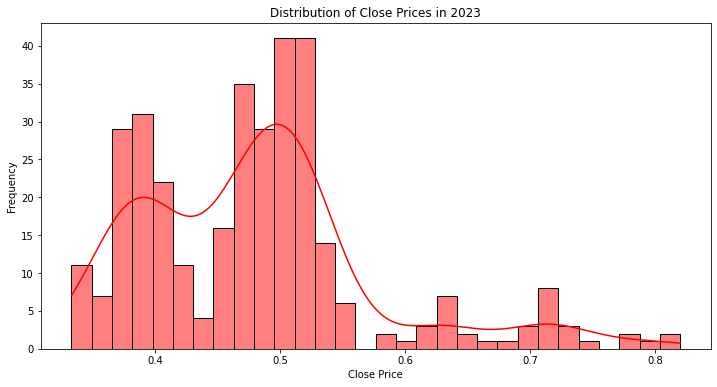

In [27]:
# Histogram showing the distribution of Close column in 2023
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='red')
plt.title('Distribution of Close Prices in 2023')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

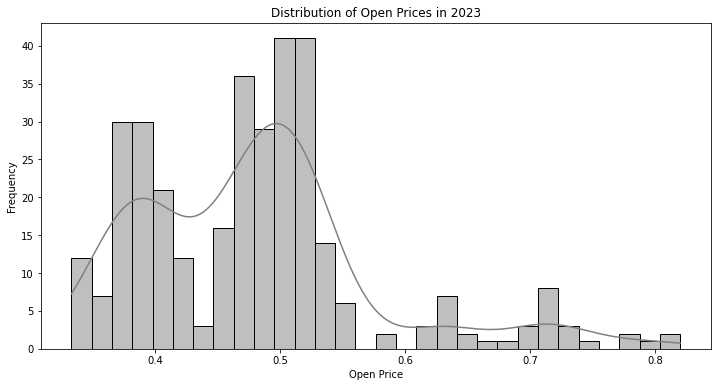

In [28]:
# Histogram showing the distribution of Open column in 2023
plt.figure(figsize=(12, 6))
sns.histplot(df['Open'], bins=30, kde=True, color='grey')
plt.title('Distribution of Open Prices in 2023')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

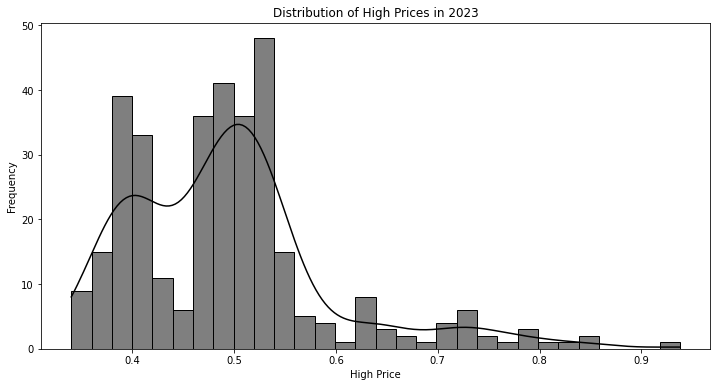

In [29]:
# Histogram showing the distribution of the High column in 2023
plt.figure(figsize=(12, 6))
sns.histplot(df['High'], bins=30, kde=True, color='black')
plt.title('Distribution of High Prices in 2023')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.show()

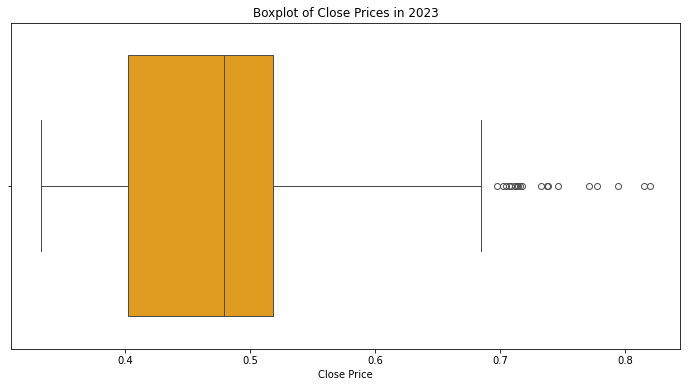

In [30]:
# boxplot to show close column of 2023 dataset
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Close'], color='orange')
plt.title('Boxplot of Close Prices in 2023')
plt.xlabel('Close Price')
plt.show()

In [31]:
#Correlation Analysis.
df.corr

<bound method DataFrame.corr of                 Source.Name     Open time    Open       Date Quartile  \
0    XRPUSDT-1d-2023-01.csv  1.670000e+12  0.3389 2023-01-01       Q1   
1    XRPUSDT-1d-2023-01.csv  1.670000e+12  0.3386 2023-01-02       Q1   
2    XRPUSDT-1d-2023-01.csv  1.670000e+12  0.3482 2023-01-03       Q1   
3    XRPUSDT-1d-2023-01.csv  1.670000e+12  0.3436 2023-01-04       Q1   
4    XRPUSDT-1d-2023-01.csv  1.670000e+12  0.3471 2023-01-05       Q1   
..                      ...           ...     ...        ...      ...   
329  XRPUSDT-1d-2023-11.csv  1.670000e+12  0.4077 2023-11-26       Q4   
330  XRPUSDT-1d-2023-11.csv  1.670000e+12  0.3960 2023-11-27       Q4   
331  XRPUSDT-1d-2023-11.csv  1.670000e+12  0.3961 2023-11-28       Q4   
332  XRPUSDT-1d-2023-11.csv  1.670000e+12  0.3888 2023-11-29       Q4   
333  XRPUSDT-1d-2023-11.csv  1.670000e+12  0.3981 2023-11-30       Q4   

        Month    High     Low   Close     Volume    Close time  \
0     January  0.3400  0.

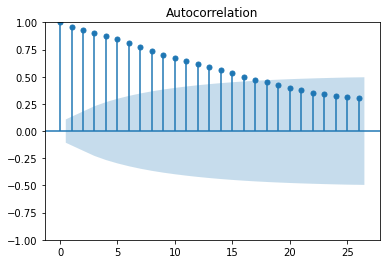

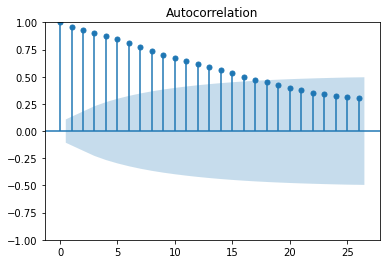

In [32]:
#Time Series Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

adfuller(df['Close']) # test for stationarity

plot_acf(df['Close']) # check autocorrelation

In [33]:
# displaying Statistical analysis
mean = df['Close'].mean() 
median = df['Close'].median()
std_dev = df['Close'].std()

In [34]:
print("Mean:", mean) 
print("Median:", median)
print("Standard deviation:", std_dev)

Mean: 0.48106556886227547
Median: 0.47950000000000004
Standard deviation: 0.09421112406729776


# Bonus question 1

In [35]:
# Bonus question 1

# calculating Skewness 
skewness_data = df['Close'].skew() 
print("Skewness :", skewness_data)

# calculating Kurtosis
Kurtosis_data = df['Close'].kurtosis()
print("Kurtosis:", Kurtosis_data)

# calculating Sharpe Ratio 
returns = df['Close'].pct_change()  
sharpe_calculated = returns.mean()/ (returns.std() * np.sqrt(252))
print("Annualized Sharpe Ratio:", sharpe_calculated)

Skewness : 1.125224156436155
Kurtosis: 1.6304116394262818
Annualized Sharpe Ratio: 0.002088405157197914


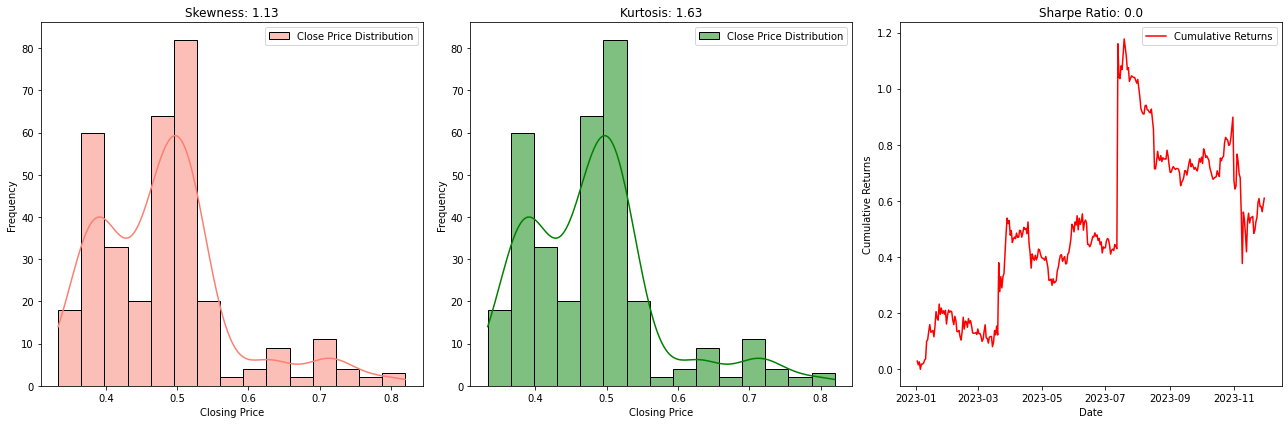

In [36]:
# Drawing histograms to visualize the calculated Skewness, Kurtosis, and Sharpe Ratio
plt.figure(figsize=(18, 6))

# Skewness of the dataset_2023
plt.subplot(1, 3, 1)
sns.histplot(df['Close'], kde=True, color='salmon', label='Close Price Distribution')
plt.title('Skewness: ' + str(round(skewness_data, 2)))
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.legend()

# Kurtosis of the dataset_2023
plt.subplot(1, 3, 2)
sns.histplot(df['Close'], kde=True, color='green', label='Close Price Distribution')
plt.title('Kurtosis: ' + str(round(Kurtosis_data, 2)))
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.legend()

# Sharpe Ratio of the dataset_2023
plt.subplot(1, 3, 3)
sns.lineplot(x=df['Date'], y=np.cumsum(returns), color='red', label='Cumulative Returns')
plt.title('Sharpe Ratio: ' + str(round(sharpe_calculated, 2)))
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

plt.tight_layout()
plt.show()

# Calculating RSI

In [37]:
# Relative Strength Index (RSI)
#Calculate the price changes between the current price and previous price:
price_changes = df['Close'].diff()

In [38]:
#Separating positive and negative changes:
positive_changes = price_changes.where(price_changes > 0, 0)
negative_changes = -1 * price_changes.where(price_changes < 0,0)

In [39]:
#Calculating the exponential moving average (EMA) of gains and losses over 14 periods:
n = 14
gains_ema = positive_changes.ewm(span=n).mean() 
losses_ema = negative_changes.ewm(span=n).mean()

In [40]:
#Calculate the Relative Strength (RS):
rs = gains_ema / losses_ema

In [41]:
#Calculating the RSI
rsi = 100 - (100 / (1 + rs))

In [42]:
print(rsi)

0             NaN
1      100.000000
2       64.155844
3       72.920755
4       42.370046
          ...    
329     51.933272
330     52.039244
331     47.562514
332     53.378404
333     58.868563
Name: Close, Length: 334, dtype: float64


<AxesSubplot: >

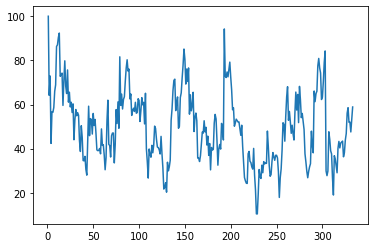

In [43]:
rsi.plot()
#refer to the graph below for dates

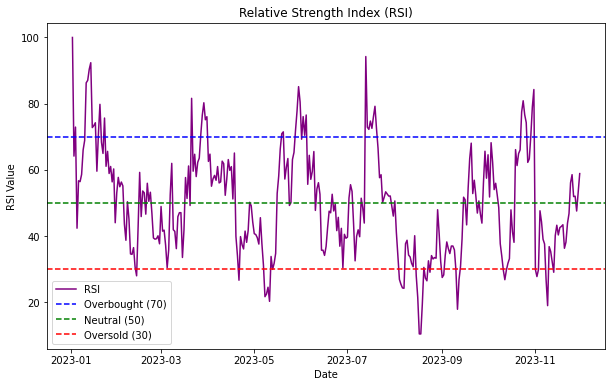

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df.set_index('Date', inplace=True)

# Calculate the price changes between the current price and previous price
changes = df['Close'].diff()
pos_changes = changes.where(changes > 0, 0)
neg_changes = -1 * changes.where(changes < 0, 0)

n = 14
gains_ema = pos_changes.ewm(span=n).mean()
losses_ema = neg_changes.ewm(span=n).mean()
rs = gains_ema / losses_ema
rsi = 100 - (100 / (1 + rs))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rsi.index, rsi, label='RSI', color='purple')
ax.axhline(70, color='blue', linestyle='--', label='Overbought (70)')
ax.axhline(50, color='green', linestyle='--', label='Neutral (50)')
ax.axhline(30, color='red', linestyle='--', label='Oversold (30)')

ax.set_title('Relative Strength Index (RSI)')
ax.set_xlabel('Date')
ax.set_ylabel('RSI Value')
ax.legend()
plt.show()

So to summarize what we have done above,

- Calculated the price changes
- Separated the positive and negative changes
- Understood EMA of gains and losses over n=14 periods
- Calculated relative strength of gains vs losses using the RSI Formula.

The values extend from 0 to 100. A few key edge levels:

- Over 70 is considered overbought
- Underneath 30 is considered oversold
- 50 is neutral

for example lets consider the following values

- Day 329: RSI was 51.933272, which is slightly neutral
- Day 330: RSI was 52.039244, still slightly neutral.
- Day 331: RSI decreased to 47.562514,little below neutral
- Day 332: RSI increased to 53.378404, slightly above neutral zone.
- Day 333: RSI went up to 58.868563, fairly above neutral approaching overbought zone.

This shows the cost is near the neutral zone over the final 5 days. 

# Exploratory Analysis

# what is trend in price data?

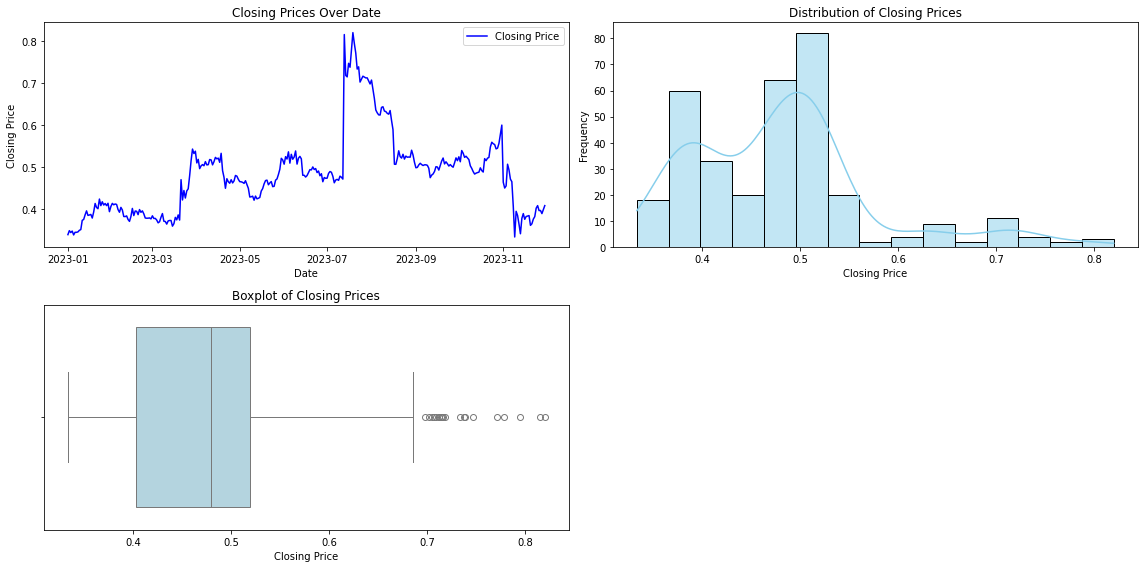

In [45]:
df.reset_index(inplace=True)

plt.figure(figsize=(16, 8))

# creating Line chart for column closing prices over time
plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Closing Prices Over Date')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Creating a histogram for the Distribution of closing prices Column
plt.subplot(2, 2, 2)
sns.histplot(df['Close'], kde=True, color='skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')

# Creating Boxplot of closing prices column
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Close'], color='lightblue')
plt.title('Boxplot of Closing Prices')
plt.xlabel('Closing Price')

plt.tight_layout()
plt.show()

In [46]:
# checking the close column against date
print(df.pivot_table(values='Close', index='Date', aggfunc='mean'))

             Close
Date              
2023-01-01  0.3387
2023-01-02  0.3482
2023-01-03  0.3436
2023-01-04  0.3472
2023-01-05  0.3380
...            ...
2023-11-26  0.3960
2023-11-27  0.3962
2023-11-28  0.3888
2023-11-29  0.3981
2023-11-30  0.4078

[334 rows x 1 columns]


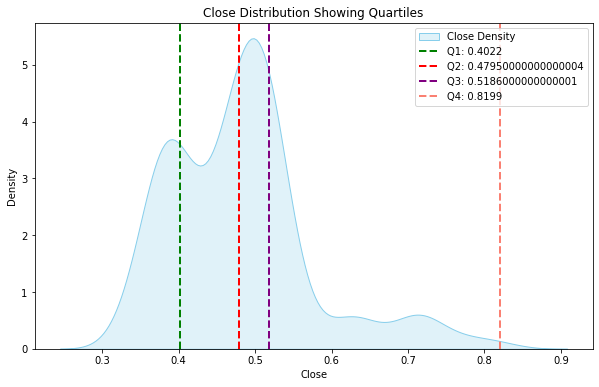

In [47]:
import seaborn as sns
# Creating a density plot with quartiles
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Close'], fill=True, color='skyblue', label='Close Density')

# Add quartile lines
q1, q2, q3, q4 = df['Close'].quantile([0.25, 0.5, 0.75, 1.0])
plt.axvline(q1, linestyle='--', color='green', linewidth=2, label=f'Q1: {q1}')
plt.axvline(q2, linestyle='--', color='red', linewidth=2, label=f'Q2: {q2}')
plt.axvline(q3, linestyle='--', color='purple', linewidth=2, label=f'Q3: {q3}')
plt.axvline(q4, linestyle='--', color='salmon', linewidth=2, label=f'Q4: {q4}')

plt.title('Close Distribution Showing Quartiles')
plt.xlabel('Close')
plt.ylabel('Density')
plt.legend()
plt.show()

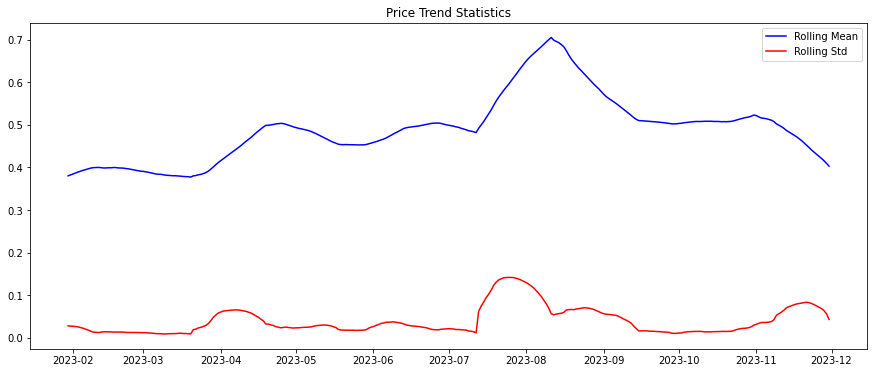

In [48]:
#Calculated Rolling Statistics

df.set_index('Date', inplace=True)

rolling_mean = df['Close'].rolling(30).mean()
rolling_std = df['Close'].rolling(30).std()
plt.figure(figsize=(15, 6))
plt.plot(rolling_mean, color='blue')
plt.plot(rolling_std, color='red')

plt.title('Price Trend Statistics')
plt.legend(['Rolling Mean', 'Rolling Std'])

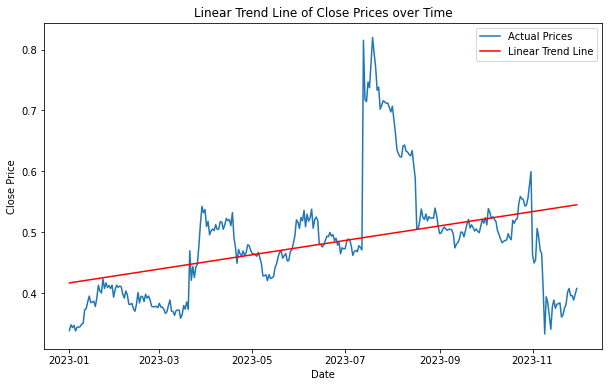

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

df.reset_index(inplace=True)

# Fit a linear trend line
slope, intercept, r_value, p_value, std_err = linregress(range(len(df)), df['Close']) 

# Plot the data and the linear trend line
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Prices')
plt.plot(df['Date'], slope * np.arange(len(df)) + intercept, 'r-', label='Linear Trend Line')

# Add labels and legend
plt.title('Linear Trend Line of Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()

# What is the volume trend?

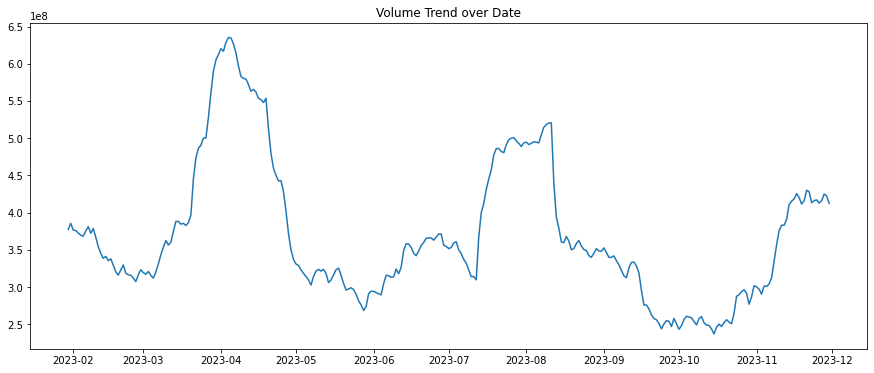

In [50]:
# Checking the volume trend over date column
df.set_index('Date', inplace=True)
plt.figure(figsize=(15, 6))
plt.plot(df['Volume'].rolling(30).mean()) 
plt.title('Volume Trend over Date')
plt.show() 

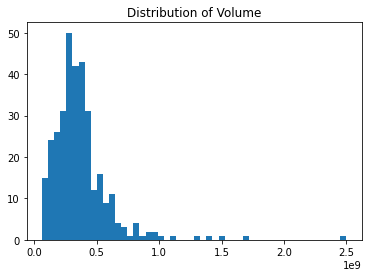

In [51]:
# Creating histogram to visualize the distribution of Volume.

df.reset_index(inplace=True)

plt.hist(df['Volume'], bins=50)
plt.title('Distribution of Volume')
plt.show()

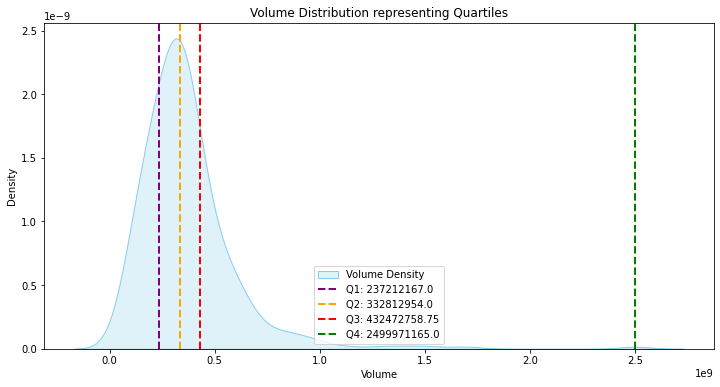

In [52]:
import seaborn as sns
# Creating a density plot with quartiles
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Volume'], fill=True, color='skyblue', label='Volume Density')

# Adding lines to indicate quartiles
q1, q2, q3, q4 = df['Volume'].quantile([0.25, 0.5, 0.75, 1.0])
plt.axvline(q1, linestyle='--', color='purple', linewidth=2, label=f'Q1: {q1}')
plt.axvline(q2, linestyle='--', color='orange', linewidth=2, label=f'Q2: {q2}')
plt.axvline(q3, linestyle='--', color='red', linewidth=2, label=f'Q3: {q3}')
plt.axvline(q4, linestyle='--', color='green', linewidth=2, label=f'Q4: {q4}')

plt.title('Volume Distribution representing Quartiles')
plt.xlabel('Volume')
plt.ylabel('Density')
plt.legend()
plt.show()

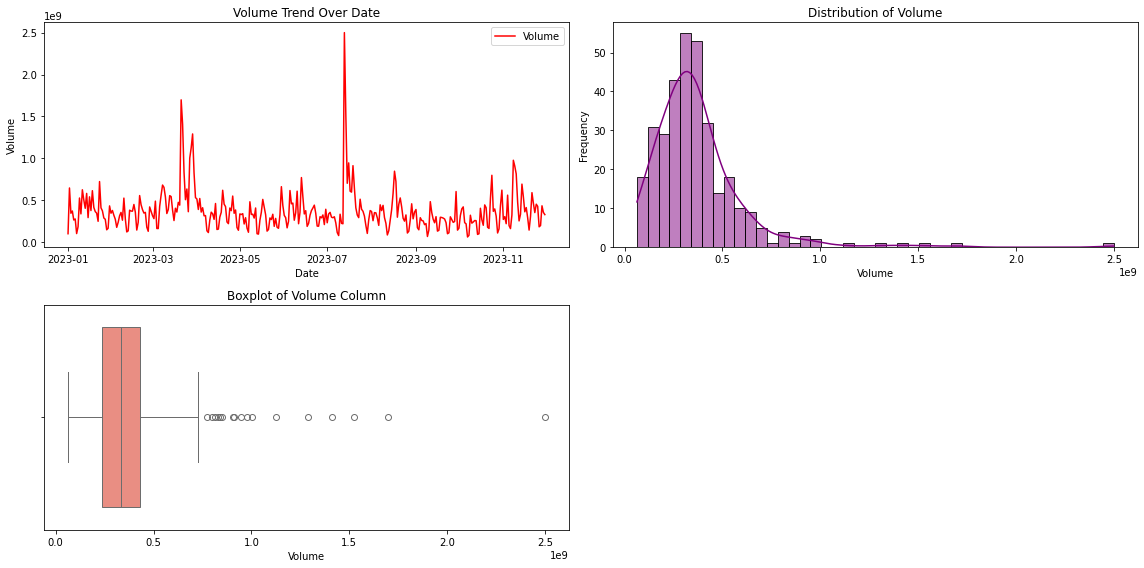

In [53]:
plt.figure(figsize=(16, 8))

# Line chart for volume over Date
plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Volume'], label='Volume', color='red')
plt.title('Volume Trend Over Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# Distribution of volume
plt.subplot(2, 2, 2)
sns.histplot(df['Volume'], kde=True, color='purple')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Boxplot of volume
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Volume'], color='salmon')
plt.title('Boxplot of Volume Column')
plt.xlabel('Volume')

plt.tight_layout()
plt.show()

In [54]:
# Extracting volume column
print(df.pivot_table(values='Volume', index='Date', aggfunc='mean'))

                 Volume
Date                   
2023-01-01  102026821.0
2023-01-02  647520487.0
2023-01-03  346410334.0
2023-01-04  372672796.0
2023-01-05  265529668.0
...                 ...
2023-11-26  184581391.0
2023-11-27  199432182.0
2023-11-28  434930297.0
2023-11-29  355638077.0
2023-11-30  329757224.0

[334 rows x 1 columns]


# Are there certain days in the month where volume is higher/ lower than normal?

<ipython-input-55-e29e649d4731>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day_of_Month', y='Volume', data=df, palette='Blues')


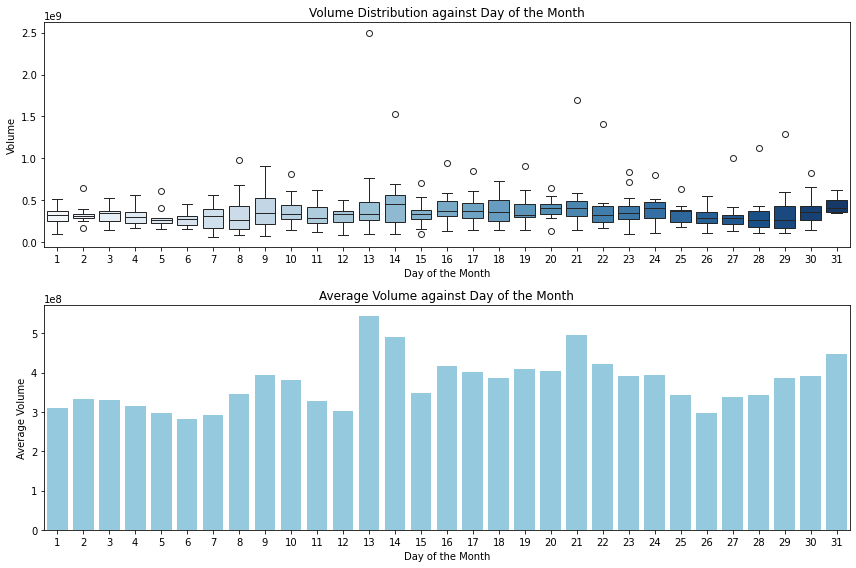

In [55]:
# Extract day of the month from the 'Date' column
df['Day_of_Month'] = df['Date'].dt.day

plt.figure(figsize=(12, 8))

# Creating Boxplot of volume against day of the month
plt.subplot(2, 1, 1)
sns.boxplot(x='Day_of_Month', y='Volume', data=df, palette='Blues')
plt.title('Volume Distribution against Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Volume')

# Creating Bar plot of average volume against day of the month
plt.subplot(2, 1, 2)
average_volume_by_day = df.groupby('Day_of_Month')['Volume'].mean()
sns.barplot(x=average_volume_by_day.index, y=average_volume_by_day.values, color='skyblue')
plt.title('Average Volume against Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Volume')

plt.tight_layout()
plt.show()

# Are there certain months where prices are higher / lower than normal?

<ipython-input-56-52d65ecbd0a8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Close', data=df, palette='cubehelix')


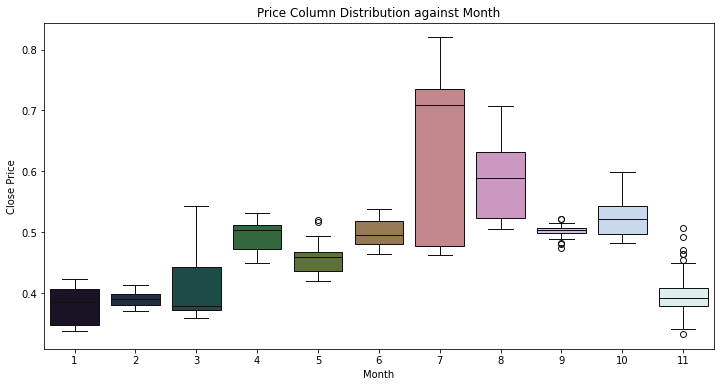

In [56]:
# Extracting month information from the Date column
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12, 6))

# Creating the Boxplot of prices column against month
sns.boxplot(x='Month', y='Close', data=df, palette='cubehelix')
plt.title('Price Column Distribution against Month')
plt.xlabel('Month')
plt.ylabel('Close Price')

plt.show()

In [57]:
df

,Date,Source.Name,Open time,Open,Quartile,Month,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Day_of_Month
0,2023-01-01,XRPUSDT-1d-2023-01.csv,1.670000e+12,0.3389,Q1,1,0.3400,0.3354,0.3387,102026821,1.670000e+12,3.447164e+07,48661,53592277,1.810790e+07,0,1
1,2023-01-02,XRPUSDT-1d-2023-01.csv,1.670000e+12,0.3386,Q1,1,0.3555,0.3000,0.3482,647520487,1.670000e+12,2.178040e+08,285660,320823575,1.080569e+08,0,2
2,2023-01-03,XRPUSDT-1d-2023-01.csv,1.670000e+12,0.3482,Q1,1,0.3520,0.3395,0.3436,346410334,1.670000e+12,1.195113e+08,154113,172318472,5.944846e+07,0,3
3,2023-01-04,XRPUSDT-1d-2023-01.csv,1.670000e+12,0.3436,Q1,1,0.3605,0.3390,0.3472,372672796,1.670000e+12,1.295853e+08,147677,193027855,6.713928e+07,0,4
4,2023-01-05,XRPUSDT-1d-2023-01.csv,1.670000e+12,0.3471,Q1,1,0.3487,0.3333,0.3380,265529668,1.670000e+12,9.073585e+07,106910,129294274,4.418781e+07,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2023-11-26,XRPUSDT-1d-2023-11.csv,1.670000e+12,0.4077,Q4,11,0.4146,0.3927,0.3960,184581391,1.670000e+12,7.455515e+07,126149,84383604,3.408793e+07,0,26
330,2023-11-27,XRPUSDT-1d-2023-11.csv,1.670000e+12,0.3960,Q4,11,0.4096,0.3942,0.3962,199432182,1.670000e+12,8.019742e+07,125340,93450039,3.758539e+07,0,27
331,2023-11-28,XRPUSDT-1d-2023-11.csv,1.670000e+12,0.3961,Q4,11,0.3991,0.3730,0.3888,434930297,1.670000e+12,1.664232e+08,240458,216541344,8.284858e+07,0,28
332,2023-11-29,XRPUSDT-1d-2023-11.csv,1.670000e+12,0.3888,Q4,11,0.4039,0.3829,0.3981,355638077,1.670000e+12,1.393426e+08,195717,178271306,6.983784e+07,0,29


- To view the distribution of closing prices over several months, we have generated the above boxplot. We looked to find any patterns or changes in the distribution of prices between the various months of the given dataset. There are some  months in particular where the prices deviated from the average observed pattern if certain months continuously show higher or lower prices than others.

#  Is there a correlation between “Volume” and “Quote Asset Volume”?

Text(0.5, 1.0, 'Volume against Quote Asset Volume')

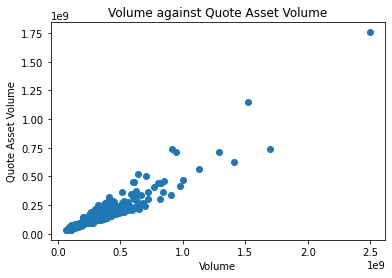

In [58]:
# Scatter plot to check volume over quote asset volume.
import matplotlib.pyplot as plt

plt.scatter(df['Volume'], df['Quote asset volume'])
plt.xlabel('Volume')  
plt.ylabel('Quote Asset Volume')
plt.title('Volume against Quote Asset Volume')

In [59]:
#Calculating correlation coefficient
print(df['Volume'].corr(df['Quote asset volume']))

0.9342150007111614


In [60]:
#Regression analysis
#Fitting a linear regression model can show if one variable predicts the other. The R-squared and coefficient indicate strength.
from sklearn.linear_model import LinearRegression

X = df['Volume'].values.reshape(-1,1)
y = df['Quote asset volume'].values

model = LinearRegression()
model.fit(X,y)

print(model.score(X, y))
print(model.coef_)

0.8727576675537555
[0.57303929]


In [61]:
#need to study
#Lag analysis
#Analyze correlation with different time lags to check for delayed relationship.
lag_corr = [df['Volume'].corr(df['Quote asset volume'].shift(i)) for i in range(1,10)]

print(lag_corr)

[0.4803742690278986, 0.2139345377985204, 0.15983825324000614, 0.09145871207463924, 0.08759006601464646, 0.1672462456617583, 0.17851943005995569, 0.07305574267766757, -0.03210495030412047]


# Is there a trend in “Number of trades”? What does it specify?

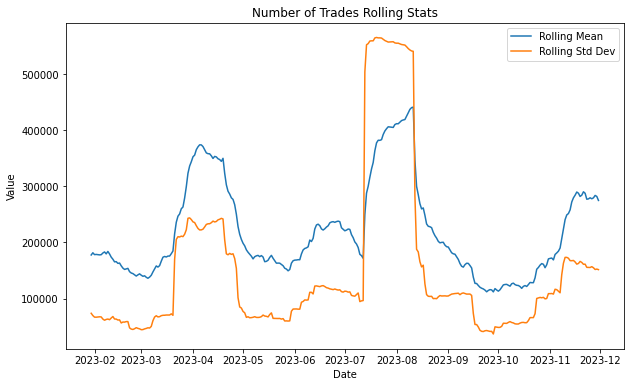

In [62]:
import matplotlib.pyplot as plt

# Assuming 'Date' is already a datetime column
df.set_index('Date', inplace=True)

# Calculate rolling statistics
rolling_mean = df['Number of trades'].rolling(30).mean()
rolling_std = df['Number of trades'].rolling(30).std()

# Plot the rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std Dev')

# Add labels and legend
plt.title('Number of Trades Rolling Stats')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [63]:
# Correlations:
print(df['Number of trades'].corr(df['Volume']))

0.925850903916568


Text(0.5, 1.0, 'Number of Trades Distribution')

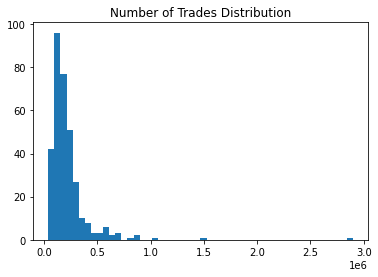

In [64]:
# Distribution:
plt.hist(df['Number of trades'], bins=50)
plt.title('Number of Trades Distribution')
#In general, an increasing trend in number of trades shows higher trading activity

# Quartile wise Analysis

In [65]:
# Average Open in terms of quartile
Average_open_quartiles=df.pivot_table(values='Open', index='Quartile', aggfunc='mean')
Average_open_quartiles

,Open
Quartile,
Q1,0.391982
Q2,0.484613
Q3,0.574027
Q4,0.463634


In [105]:
import pandas as pd

# Assuming 'Date' is already a datetime column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for Quartile Ends
quartile_ends = df.groupby('Quartile')['Date'].max().reset_index()
quartile_ends.rename(columns={'Date': 'Quartile End'}, inplace=True)

# Merge quartile_ends with the original DataFrame
df = pd.merge(df, quartile_ends, on='Quartile')

# Create a pivot table
Average_open_quartiles = df.pivot_table(values='Open', index=['Quartile', 'Quartile End'], aggfunc='mean')

# Print the resulting DataFrame
print(Average_open_quartiles)

                           Open
Quartile Quartile End          
Q1       2023-03-31    0.391982
Q2       2023-06-30    0.484613
Q3       2023-09-30    0.574027
Q4       2023-11-30    0.463634


In [66]:
# Average Low in terms of quartile
Average_low_quartiles=df.pivot_table(values='Low', index='Quartile', aggfunc='mean')
Average_low_quartiles

,Low
Quartile,
Q1,0.381841
Q2,0.471001
Q3,0.556133
Q4,0.448569


In [107]:
import pandas as pd

# Assuming 'Date' is already a datetime column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for Quartile Ends
quartile_ends = df.groupby('Quartile')['Date'].max().reset_index()
quartile_ends.rename(columns={'Date': 'Quartile End'}, inplace=True)

# Merge quartile_ends with the original DataFrame using suffixes
df = pd.merge(df, quartile_ends, on='Quartile', suffixes=('', '_quartile_end'))

# Create a pivot table for Average Low
Average_low_quartiles = df.pivot_table(values='Low', index=['Quartile', 'Quartile End'], aggfunc='mean')

# Print the resulting DataFrame
print(Average_low_quartiles)


                            Low
Quartile Quartile End          
Q1       2023-03-31    0.381841
Q2       2023-06-30    0.471001
Q3       2023-09-30    0.556133
Q4       2023-11-30    0.448569


In [67]:
# Average CLose in terms of quartile
Average_close_quartiles=df.pivot_table(values='Close', index='Quartile', aggfunc='mean')
Average_close_quartiles

,Close
Quartile,
Q1,0.394190
Q2,0.483902
Q3,0.574489
Q4,0.464110


In [108]:
import pandas as pd

# Assuming 'Date' is already a datetime column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for Quartile Ends
quartile_ends = df.groupby('Quartile')['Date'].max().reset_index()
quartile_ends.rename(columns={'Date': 'Quartile End'}, inplace=True)

# Merge quartile_ends with the original DataFrame using suffixes
df = pd.merge(df, quartile_ends, on='Quartile', suffixes=('', '_quartile_end'))

# Create a pivot table for Average Close
Average_close_quartiles = df.pivot_table(values='Close', index=['Quartile', 'Quartile End'], aggfunc='mean')

# Print the resulting DataFrame
print(Average_close_quartiles)

                          Close
Quartile Quartile End          
Q1       2023-03-31    0.394190
Q2       2023-06-30    0.483902
Q3       2023-09-30    0.574489
Q4       2023-11-30    0.464110


In [68]:
# Volume column distribution in terms of quartile
Average_volume_quartiles=df.pivot_table(values='Volume', index='Quartile', aggfunc='sum')
Average_volume_quartiles

,Volume
Quartile,
Q1,39267648024
Q2,29910363459
Q3,33366083252
Q4,21593222062


In [109]:
import pandas as pd

# Assuming 'Date' is already a datetime column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for Quartile Ends
quartile_ends = df.groupby('Quartile')['Date'].max().reset_index()
quartile_ends.rename(columns={'Date': 'Quartile End'}, inplace=True)

# Merge quartile_ends with the original DataFrame using suffixes
df = pd.merge(df, quartile_ends, on='Quartile', suffixes=('', '_quartile_end'))

# Create a pivot table for Sum of Volume
Average_volume_quartiles = df.pivot_table(values='Volume', index=['Quartile', 'Quartile End'], aggfunc='sum')

# Print the resulting DataFrame
print(Average_volume_quartiles)

                            Volume
Quartile Quartile End             
Q1       2023-03-31    39267648024
Q2       2023-06-30    29910363459
Q3       2023-09-30    33366083252
Q4       2023-11-30    21593222062


In [69]:
# Number of trades column distribution in terms of quartile
number_of_trades_quartiles=df.pivot_table(values='Number of trades', index='Quartile', aggfunc='sum')
number_of_trades_quartiles

,Number of trades
Quartile,
Q1,19891003
Q2,18056441
Q3,21895812
Q4,13458824


In [113]:
import pandas as pd

# Assuming 'Date' is already a datetime column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for Quartile Ends
quartile_ends = df.groupby('Quartile')['Date'].max().reset_index()
quartile_ends.rename(columns={'Date': 'Quartile End'}, inplace=True)

# Merge quartile_ends with the original DataFrame using suffixes
df = pd.merge(df, quartile_ends, on='Quartile', suffixes=('', '_quartile_end'))

# Create a pivot table for Sum of Number of trades
number_of_trades_quartiles = df.pivot_table(values='Number of trades', index=['Quartile', 'Quartile End'], aggfunc='sum')

# Print the resulting DataFrame
print(number_of_trades_quartiles)

                       Number of trades
Quartile Quartile End                  
Q1       2023-03-31            19891003
Q2       2023-06-30            18056441
Q3       2023-09-30            21895812
Q4       2023-11-30            13458824


In [110]:
import pandas as pd

# Assuming 'Date' is already a datetime column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for Quartile Ends
quartile_ends = df.groupby('Quartile')['Date'].max().reset_index()
quartile_ends.rename(columns={'Date': 'Quartile End'}, inplace=True)

# Merge quartile_ends with the original DataFrame using suffixes
df = pd.merge(df, quartile_ends, on='Quartile', suffixes=('', '_quartile_end'))

# Create a pivot table for Sum of Number of Trades
number_of_trades_quartiles = df.pivot_table(values='Number of trades', index=['Quartile', 'Quartile End'], aggfunc='sum')

# Print the resulting DataFrame
print(number_of_trades_quartiles)

                       Number of trades
Quartile Quartile End                  
Q1       2023-03-31            19891003
Q2       2023-06-30            18056441
Q3       2023-09-30            21895812
Q4       2023-11-30            13458824


In [70]:
import pandas as pd

# Assuming 'Date' is already a datetime column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for Quartile Ends
quartile_ends = df.groupby('Quartile')['Date'].max().reset_index()
quartile_ends.rename(columns={'Date': 'Quartile End'}, inplace=True)


,mean,max,min,count
,Close,Close,Close,Close
Quartile,,,,
Q1,0.394190,0.5425,0.3380,90
Q2,0.483902,0.5380,0.4207,91
Q3,0.574489,0.8199,0.4622,92
Q4,0.464110,0.5996,0.3331,61


# Trend in price data - quartile wise

In [71]:
# Descriptive statistics in terms of quartile
quartile_statistics = df.groupby('Quartile')[['Open','High','Low','Close']].agg(['mean', 'min', 'max'])
print(quartile_statistics)

              Open                      High                       Low  \
              mean     min     max      mean     min     max      mean   
Quartile                                                                 
Q1        0.391982  0.3380  0.5425  0.404684  0.3400  0.5850  0.381841   
Q2        0.484613  0.4207  0.5380  0.494727  0.4304  0.5658  0.471001   
Q3        0.574027  0.4622  0.8198  0.589746  0.4708  0.9380  0.556133   
Q4        0.463634  0.3332  0.5780  0.476039  0.3690  0.6213  0.448569   

                             Close                  
             min     max      mean     min     max  
Quartile                                            
Q1        0.3000  0.5257  0.394190  0.3380  0.5425  
Q2        0.4100  0.5205  0.483902  0.4207  0.5380  
Q3        0.4226  0.7710  0.574489  0.4622  0.8199  
Q4        0.3160  0.5627  0.464110  0.3331  0.5996  


Text(0.5, 1.0, 'Average Close Price in terms of Quartiles')

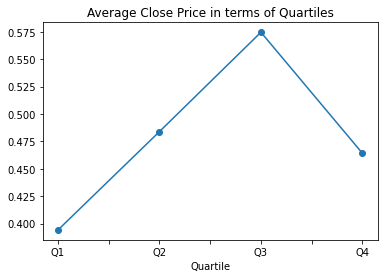

In [72]:
# Line plot
quartile_prices = df.groupby('Quartile')['Close'].mean()
quartile_prices.plot(marker='o')
plt.title('Average Close Price in terms of Quartiles')

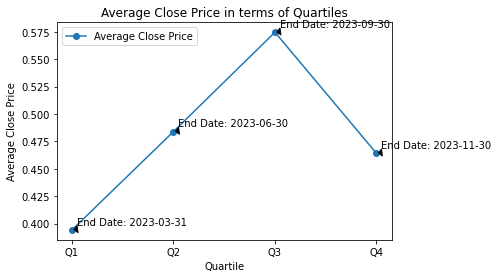

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' is already a datetime column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for Quartile Ends
quartile_ends = df.groupby('Quartile')['Date'].max().reset_index()
quartile_ends.rename(columns={'Date': 'Quartile End'}, inplace=True)

# Line plot
quartile_prices = df.groupby('Quartile')['Close'].mean()
quartile_prices = quartile_prices.reindex(['Q1', 'Q2', 'Q3', 'Q4'])  # Ensure quartiles are in the correct order
quartile_prices.plot(marker='o', label='Average Close Price')
plt.title('Average Close Price in terms of Quartiles')
plt.xlabel('Quartile')
plt.ylabel('Average Close Price')

# Custom tick locator for the x-axis
plt.xticks(range(len(quartile_prices)), quartile_prices.index)

# Annotate quartile end dates
for quartile, end_date in zip(quartile_prices.index, quartile_ends['Quartile End']):
    plt.annotate(f'End Date: {end_date.strftime("%Y-%m-%d")}', 
                 xy=(quartile_prices.index.get_loc(quartile), quartile_prices[quartile]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7'))

plt.legend()
plt.show()

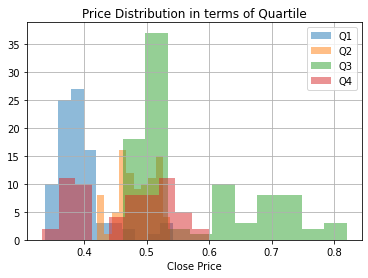

In [73]:
# Compare distributions
plt.figure()
for q in df['Quartile'].unique():
    df[df['Quartile']==q]['Close'].hist(alpha=0.5, label=q)
plt.legend()
plt.xlabel('Close Price')
plt.title('Price Distribution in terms of Quartile')

plt.show()

# What is the volume trend? - Quartile wise Analysis

In [74]:
# Volume descriptive statistics in terms of Quartile
quartile_volume = df.groupby('Quartile')[['Volume']].agg(['mean','min','max','std'])
print(quartile_volume)

                Volume                                     
                  mean        min         max           std
Quartile                                                   
Q1        4.363072e+08  102026821  1698380685  2.701134e+08
Q2        3.286853e+08   97517794   771631184  1.350026e+08
Q3        3.626748e+08   69132813  2499971165  3.113183e+08
Q4        3.539872e+08   63137112   978082649  1.975438e+08


Text(0.5, 1.0, 'Average Volume by Quartile')

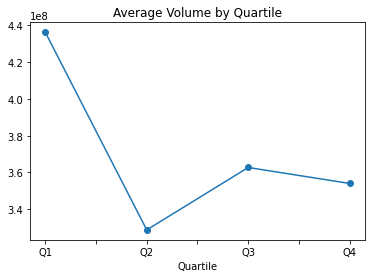

In [75]:
# Line plot  
quartile_volume_mean = df.groupby('Quartile')['Volume'].mean()
quartile_volume_mean.plot(marker='o')
plt.title('Average Volume by Quartile')

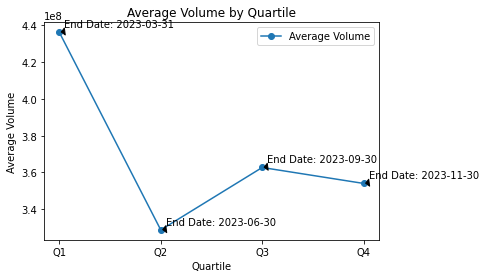

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' is already a datetime column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for Quartile Ends
quartile_ends = df.groupby('Quartile')['Date'].max().reset_index()
quartile_ends.rename(columns={'Date': 'Quartile End'}, inplace=True)

# Line plot
quartile_volume_mean = df.groupby('Quartile')['Volume'].mean()
quartile_volume_mean = quartile_volume_mean.reindex(['Q1', 'Q2', 'Q3', 'Q4'])  # Ensure quartiles are in the correct order
quartile_volume_mean.plot(marker='o', label='Average Volume')
plt.title('Average Volume by Quartile')
plt.xlabel('Quartile')
plt.ylabel('Average Volume')

# Custom tick locator for the x-axis
plt.xticks(range(len(quartile_volume_mean)), quartile_volume_mean.index)

# Annotate quartile end dates
for quartile, end_date in zip(quartile_volume_mean.index, quartile_ends['Quartile End']):
    plt.annotate(f'End Date: {end_date.strftime("%Y-%m-%d")}', 
                 xy=(quartile_volume_mean.index.get_loc(quartile), quartile_volume_mean[quartile]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7'))

plt.legend()
plt.show()

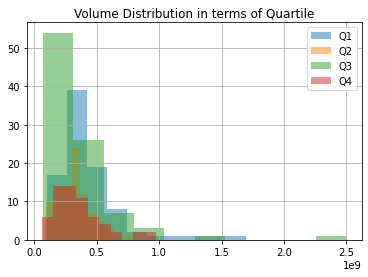

In [76]:
# Distribution comparison
plt.figure() 
for q in df['Quartile'].unique():
    df[df['Quartile']==q]['Volume'].hist(alpha=0.5, label=q) 
plt.legend()
plt.title('Volume Distribution in terms of Quartile')
    
plt.show()

# Are there certain months where prices are higher / lower than normal? Quartile wise Analysis

In [77]:
# Average Close Price in terms of Quartile
quartile_average_price = df.groupby('Quartile')['Close'].mean()
quartile_average_price

Quartile
Q1    0.394190
Q2    0.483902
Q3    0.574489
Q4    0.464110
Name: Close, dtype: float64

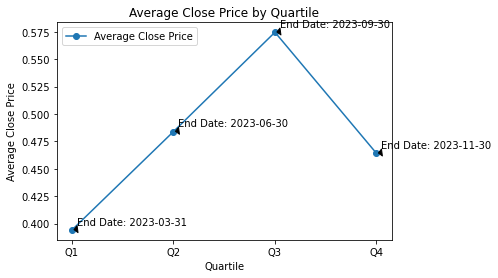

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' is already a datetime column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for Quartile Ends
quartile_ends = df.groupby('Quartile')['Date'].max().reset_index()
quartile_ends.rename(columns={'Date': 'Quartile End'}, inplace=True)

# Average Close Price by Quartile
quartile_average_price = df.groupby('Quartile')['Close'].mean()
quartile_average_price = quartile_average_price.reindex(['Q1', 'Q2', 'Q3', 'Q4'])  # Ensure quartiles are in the correct order

# Line plot
quartile_average_price.plot(marker='o', label='Average Close Price')
plt.title('Average Close Price by Quartile')
plt.xlabel('Quartile')
plt.ylabel('Average Close Price')

# Custom tick locator for the x-axis
plt.xticks(range(len(quartile_average_price)), quartile_average_price.index)

# Annotate quartile end dates
for quartile, end_date in zip(quartile_average_price.index, quartile_ends['Quartile End']):
    plt.annotate(f'End Date: {end_date.strftime("%Y-%m-%d")}', 
                 xy=(quartile_average_price.index.get_loc(quartile), quartile_average_price[quartile]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7'))

plt.legend()
plt.show()

In [78]:
# Overall average close price
average_price = df['Close'].mean() 
print(f"Overall Mean Close Price: {average_price}")

Overall Mean Close Price: 0.48106556886227547


In [79]:
# Calculate z-scores
z = (quartile_average_price - average_price)/df['Close'].std()  

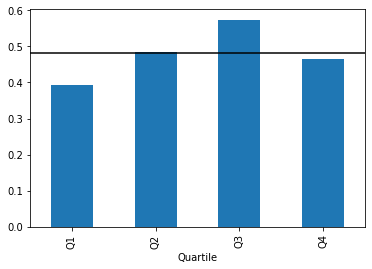

In [80]:
# Bar plot
ax = quartile_average_price.plot(kind='bar')
ax.hlines(average_price, *ax.get_xlim(), color='black') 

# Is there a trend in “Number of trades”? What does it specify? - Quartile wise Analysis

In [81]:
# Quartile-wise analysis
quartiles_analysis = df.groupby('Quartile')['Number of trades'].describe()

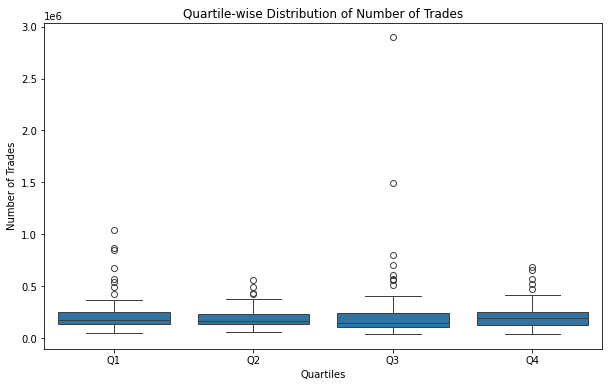

In [82]:
# Visualizing the quartile-wise distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quartile', y='Number of trades', data=df)
plt.title('Quartile-wise Distribution of Number of Trades')
plt.xlabel('Quartiles')
plt.ylabel('Number of Trades')
plt.show()

# Month wise Analysis

In [83]:
# descriptive statistics of month  
print(df.groupby('Month')[['Open','High','Low','Close','Volume']].describe())

       Open                                                                   \
      count      mean       std     min       25%      50%       75%     max   
Month                                                                          
1      31.0  0.378884  0.028765  0.3380  0.347650  0.38550  0.405600  0.4233   
2      28.0  0.391561  0.012272  0.3703  0.381800  0.39205  0.399125  0.4132   
3      31.0  0.405461  0.052793  0.3589  0.371850  0.37730  0.434450  0.5425   
4      30.0  0.497363  0.023765  0.4491  0.475875  0.50490  0.515625  0.5375   
5      31.0  0.455748  0.022243  0.4207  0.436550  0.45970  0.467250  0.5205   
6      30.0  0.501690  0.020561  0.4648  0.484550  0.49795  0.519175  0.5380   
7      31.0  0.629484  0.136436  0.4622  0.476500  0.70900  0.735150  0.8198   
8      31.0  0.588077  0.063915  0.5062  0.524000  0.61040  0.633650  0.7069   
9      30.0  0.502203  0.010498  0.4744  0.499000  0.50355  0.507500  0.5215   
10     31.0  0.520365  0.025852  0.4831 

Text(0, 0.5, 'Average Volume distribution')

<Figure size 432x288 with 0 Axes>

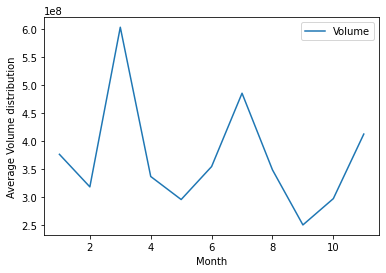

In [84]:
# Volume over time  
plt.figure()
df.pivot_table(values='Volume', index='Month', aggfunc='mean').plot()
plt.ylabel('Average Volume distribution')

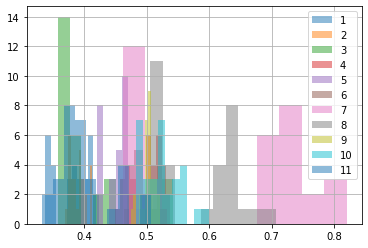

In [85]:
# Distribution comparison  
plt.figure() 
for month in df['Month'].unique():
    df[df['Month']==month]['Close'].hist(alpha=0.5, label=month)
plt.legend()

In [86]:
# Price difference  
close_difference = df.groupby('Month')['Close'].agg(['mean','std'])
print(close_difference)

           mean       std
Month                    
1      0.381058  0.028150
2      0.390493  0.012282
3      0.410661  0.057538
4      0.495137  0.022998
5      0.457232  0.024677
6      0.500227  0.020999
7      0.636748  0.133806
8      0.582058  0.062037
9      0.502333  0.010639
10     0.523100  0.029485
11     0.403153  0.043218


# Price Trend - Month

In [87]:
# Price trend per month
print(df.groupby('Month')[['Open', 'Close']].agg(['mean', 'min', 'max']))

           Open                     Close                
           mean     min     max      mean     min     max
Month                                                    
1      0.378884  0.3380  0.4233  0.381058  0.3380  0.4234
2      0.391561  0.3703  0.4132  0.390493  0.3703  0.4131
3      0.405461  0.3589  0.5425  0.410661  0.3589  0.5425
4      0.497363  0.4491  0.5375  0.495137  0.4491  0.5324
5      0.455748  0.4207  0.5205  0.457232  0.4207  0.5205
6      0.501690  0.4648  0.5380  0.500227  0.4647  0.5380
7      0.629484  0.4622  0.8198  0.636748  0.4622  0.8199
8      0.588077  0.5062  0.7069  0.582058  0.5062  0.7069
9      0.502203  0.4744  0.5215  0.502333  0.4744  0.5215
10     0.520365  0.4831  0.5780  0.523100  0.4830  0.5996
11     0.405013  0.3332  0.5063  0.403153  0.3331  0.5064


Text(0, 0.5, 'Price')

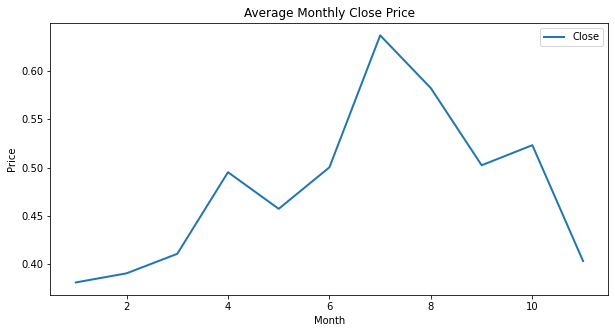

In [88]:
# Line plot of monthly average close price
monthly_price = df.pivot_table(values='Close', index='Month', aggfunc='mean')
monthly_price.plot(linewidth=2, figsize=(10, 5), title='Average Monthly Close Price')
plt.ylabel('Price')

<AxesSubplot: xlabel='Month'>

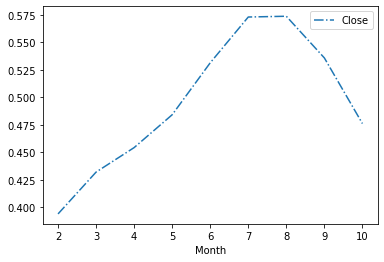

In [89]:
# Rolling mean to smooth the time-series
rol_mean = monthly_price.rolling(3, center=True).mean()
rol_mean.plot(style='-.') 

# Volume Trend - Month Wise

In [90]:
# Volume statistics by month
vol_stats = df.groupby('Month')[['Volume']].agg(['mean','min','max','std'])
print(vol_stats)

             Volume                                     
               mean        min         max           std
Month                                                   
1      3.763582e+08  102026821   723894773  1.610924e+08
2      3.183560e+08  123179600   557018367  1.165605e+08
3      6.027928e+08  163637644  1698380685  3.646001e+08
4      3.368425e+08  116122379   620153279  1.314977e+08
5      2.957811e+08   97517794   662891231  1.293073e+08
6      3.545292e+08  172139129   771631184  1.416222e+08
7      4.852038e+08   80147955  2499971165  4.751659e+08
8      3.486473e+08   87289374   847602528  1.663132e+08
9      2.505566e+08   69132813   604996777  1.126067e+08
10     2.974210e+08   63137112   798801237  1.662354e+08
11     4.124391e+08  145313373   978082649  2.125945e+08


In [91]:
# Line plot of monthly average volume
monthly_vol = df.pivot_table(values='Volume', index='Month', aggfunc='mean') 

<AxesSubplot: xlabel='Month'>

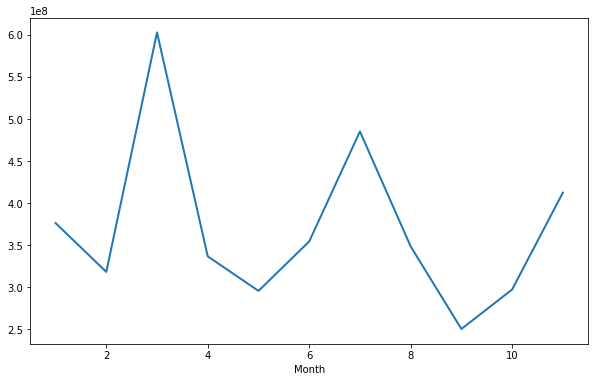

In [92]:
monthly_vol.plot(linewidth=2, figsize=(10, 6), legend=False)

<AxesSubplot: xlabel='Month'>

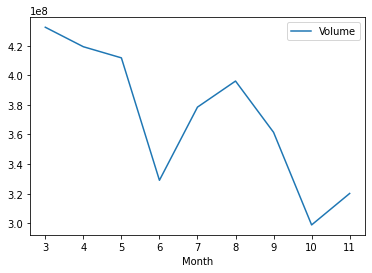

In [93]:
# Smoothed trend with rolling mean
rolmean = monthly_vol.rolling(window=3).mean() 
rolmean.plot()

# Are there certain months where prices are higher / lower than normal?

In [94]:
month_close = df.pivot_table(values='Close', index='Month', aggfunc='mean')

# choosing average close price across months 
mean_monthly_close = df['Close'].mean()
print(f"Overall mean close price: {mean_monthly_close}")

Overall mean close price: 0.48106556886227547


In [95]:
# Calculate z-scores  
z = (month_close - mean_monthly_close)/df['Close'].std()

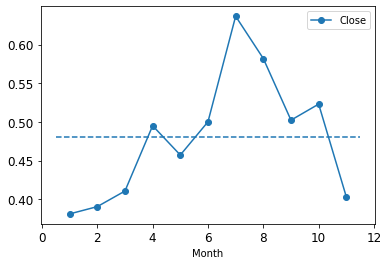

In [96]:
# Plot prices and highlight unusual months
ax = month_close.plot(fontsize=12, marker='o')
ax.hlines(mean_monthly_close, *ax.get_xlim(), linestyle='--', label='Overall Mean')

# Is there a trend in “Number of trades”? What does it specify?

In [97]:
# checking out trades monthly
monthly_trades = df.pivot_table(values='Number of trades', index='Month', aggfunc='sum')

<AxesSubplot: xlabel='Month'>

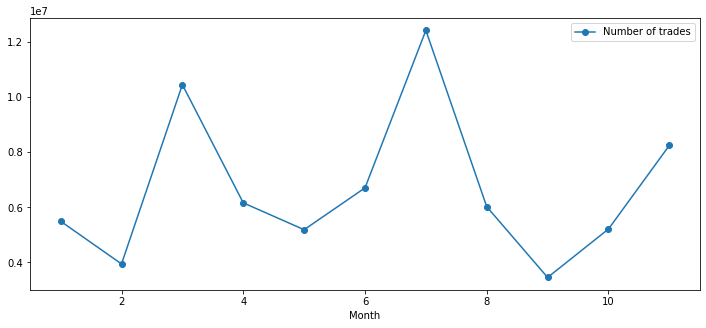

In [98]:
# Plot 
fig, ax = plt.subplots() 
monthly_trades.plot(ax=ax, marker='o', linestyle='-', figsize=(12, 5))

# Based on the data given, predict the price of XRP USD in the next months.

In [99]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Selecting features  
required_features = ['Volume','Quote asset volume','Number of trades']
X = df[required_features]  

# taking close column asOutput variable 
y = df['Close']   

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Model performance
print(model.score(X_test, y_test))

# Getting the last 2 months of  data
last_62 = df.tail(62)
last_X = last_62[required_features]
last_y = last_62['Close']

# Predicting till 31st Jan
predicted_X = model.predict(last_X)
predicted_df = pd.DataFrame({'Date': pd.date_range('2023-12-01', periods=62), 'Close': predicted_X})  

print(predicted_df['Close'])

# Export to Excel
export_file_path = 'predicted_values.xlsx'
predicted_df.to_excel(export_file_path, index=False)

print(f"Predicted values exported to {export_file_path}")

0.7569351515941639
0     0.493454
1     0.498597
2     0.513591
3     0.516027
4     0.513044
        ...   
57    0.452328
58    0.452381
59    0.402451
60    0.424916
61    0.432945
Name: Close, Length: 62, dtype: float64
Predicted values exported to predicted_values.xlsx


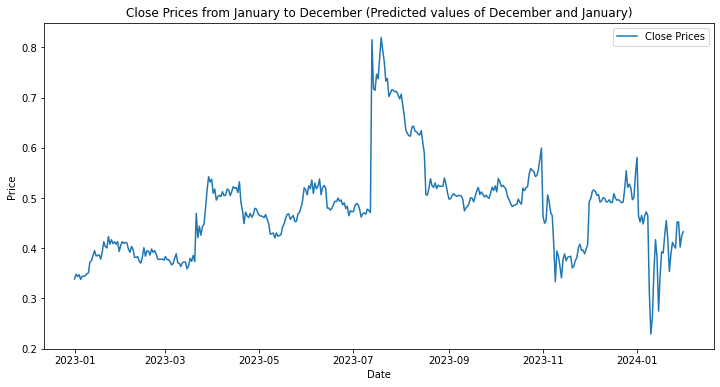

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
df.reset_index(inplace=True)
# Converting 'Date' columns to datetime with the specified format
predicted_df['Date'] = pd.to_datetime(predicted_df['Date'], format='%d-%m-%Y')
 
# adding the original and predicted DataFrames and creating a single dataframe
final_df = pd.concat([df[['Date', 'Close']], predicted_df[['Date', 'Close']]])
 
# Plot the close prices distributions from January 2023 to January 2024
plt.figure(figsize=(12, 6))
plt.plot(final_df['Date'], final_df['Close'], label='Close Prices')
plt.title('Close Prices from January to December (Predicted values of December and January)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()